**Data Description**
**This dataset contains detailed information about insurance customers, including their age, sex, body mass index (BMI), number of children, smoking status and region. Having access to such valuable insights allows analysts to get a better view into customer behaviour and the factors that contribute to their insurance charges. By understanding the patterns in this data set we can gain useful insight into how age,gender and lifestyle choices can affect a person's insurance premiums. This could be of great value when setting up an insurance plan or marketing campaigns that target certain demographics. Furthermore, this dataset provides us with an opportunity to explore deeper questions such as what are some possible solutions for increasing affordability when it comes to dealing with high charges for certain groups?**
* In this project:
    * Imported dataset from my local computer by using pandas but this is the source of the             original data **https://data.world/bob-wakefield**
    * Reading the data dictionary to understand more about the dataset
    * Cleaned, analyzed data from the dataset to know how many null rows
    * Used pandas library to filter out the specific information



**Objectives:** 
* Using age, sex and bmi to create an algorithm for assessing life insurance costs.
* Predicting costs for certain patients based on their sex, age, bmi and region to help doctors     decide what treatments work best financially for them.
* Creating a cost calculator that takes into account the patient’s age, sex, smoker status,         region of residence and other factors to accurately predict the medical bills a person will pay   in a year

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
#iporting data
insurance_df = pd.read_csv("D:\\databases\\PYTHON\\30_DAYS_OF_PYTHON\\insurance\\insurance.csv")
insurance_df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#info about the data
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


**The data consist 1338 entries**

## Analyzing Data

In [4]:
insurance_df.sort_values('age').reset_index()

,level_0,index,age,sex,bmi,children,smoker,region,charges
0,1248,1248,18,female,39.820,0,no,southeast,1633.96180
1,482,482,18,female,31.350,0,no,southeast,1622.18850
2,492,492,18,female,25.080,0,no,northeast,2196.47320
3,525,525,18,female,33.880,0,no,southeast,11482.63485
4,529,529,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...,...,...
1333,398,398,64,male,25.600,2,no,southwest,14988.43200
1334,335,335,64,male,34.500,0,no,southwest,13822.80300
1335,378,378,64,female,30.115,3,no,northwest,16455.70785
1336,1265,1265,64,male,23.760,0,yes,southeast,26926.51440


**According to the data the youngest age is 18 and the oldest age is 64**

In [5]:
#the number of males and females and their percentages
counts = insurance_df['sex'].value_counts()
percent = insurance_df['sex'].value_counts(normalize=True)
percent100 = insurance_df['sex'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})


,counts,per,per100
male,676,0.505232,50.5%
female,662,0.494768,49.5%


**We have 676 males and 663 males, males represent 50.5% and females represent 49.5%**

## This is the age breakdown

In [6]:
counts = insurance_df['age'].value_counts()
percent = insurance_df['age'].value_counts(normalize=True)
percent100 = insurance_df['age'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})


,counts,per,per100
18,69,0.051570,5.2%
19,68,0.050822,5.1%
50,29,0.021674,2.2%
51,29,0.021674,2.2%
47,29,0.021674,2.2%
46,29,0.021674,2.2%
45,29,0.021674,2.2%
20,29,0.021674,2.2%
48,29,0.021674,2.2%
52,29,0.021674,2.2%


In [26]:
# # Replacing string values to numbers

insurance_df['sex'] = insurance_df['sex'].replace({'male':0,'female':1})
insurance_df['smoker'] = insurance_df['smoker'].replace({'yes':1, 'no':0})
insurance_df['region'] = insurance_df['region'].replace({'southwest':1, 'southeast':2,
                                                         'northwest':3, 'northeast':4})

In [23]:
insurance_df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,1,27.900,0,1,1,16884.92400
1,1,18,0,33.770,1,0,2,1725.55230
2,2,28,0,33.000,3,0,2,4449.46200
3,3,33,0,22.705,0,0,3,21984.47061
4,4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,0,30.970,3,0,3,10600.54830
1334,1334,18,1,31.920,0,0,4,2205.98080
1335,1335,18,1,36.850,0,0,2,1629.83350
1336,1336,21,1,25.800,0,0,1,2007.94500


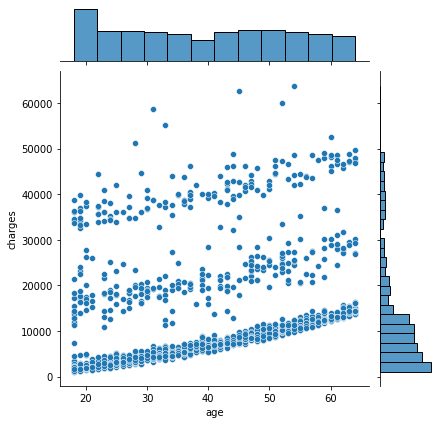

In [27]:
# Let’s create some simple plots to check out the data.
import seaborn as sns
#Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=insurance_df['age'],y=insurance_df['charges'])

**Here we see that as Age goes up Charges for health insurance also trends up**


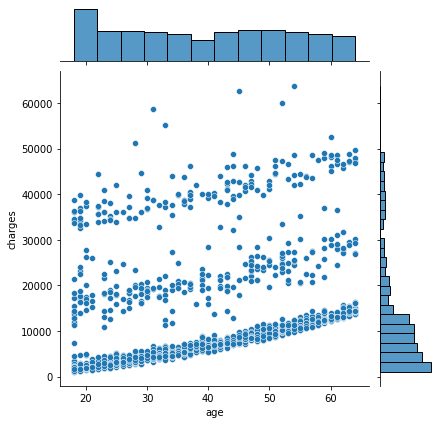

In [28]:
#Correlation betweeen 'charges' and 'smoker' 
sns.jointplot(x=insurance_df['age'],y=insurance_df['charges'])


**Here we see that as Age goes up Charges for health insurance also trends up**

**Step 1: First we will split our data into ‘X’ array that contains 
the features and a ‘y’ array with the target variable.**


In [29]:
features_X = insurance_df[['age', 'sex', 'bmi', 'children','smoker','region']]
predicted_y = insurance_df['charges']
features_X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,4
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


In [30]:
predicted_y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [63]:
# //First, we will import the required libraries importing train_test_split model
from sklearn.model_selection import train_test_split
# Split the dataset into a training set and a test set
X = features_X = insurance_df[['age', 'sex', 'bmi', 'children','smoker','region']]
Y = predicted_y = insurance_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [66]:
#We can quickly check the number of records for both training dataset and testing dataset
len(X_train) 

1070

In [67]:
len(X_test) 

268

In [69]:
len(insurance_df) 

1338

In [70]:
len(y_train) 

1070

In [71]:
len(y_test) 

268

In [77]:
# //Now that we have a train and test datasets, we can evaluate the model 
from sklearn.linear_model import LinearRegression

# Assume that you have training data stored in two variables: X and y
# X is a 2D array with shape (n_samples, n_features)
# y is a 1D array with shape (n_samples)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, Y)

LinearRegression()

In [80]:
# Use the model to make predictions on the new data
y_pred = model.predict(X)

In [47]:
def calculate_life_insurance_cost(age, sex, bmi):
    # Initialize the base cost to a default value
    cost = 1000

    # Adjust the cost based on age
    if age < 20:
        cost -= 200
    elif age < 30:
        cost -= 100
    elif age < 40:
        cost += 100
    else:
        cost += 200

    # Adjust the cost based on sex
    if sex == "male":
        cost += 50
    if sex == "female":
        cost += 30

    # Adjust the cost based on BMI
    if bmi < 18.5:
        cost -= 100
    elif bmi > 25:
        cost += 100

    return cost

In [38]:
cost = calculate_life_insurance_cost(35, "male", 22.5)
print(cost)

950


In [41]:
def predict_treatment_cost(sex, age, bmi, region):
    # Initialize the base cost to a default value
    cost = 1000

    # Adjust the cost based on age
    if age < 30:
        cost -= 200
    elif age < 40:
        cost -= 100
    elif age < 50:
        cost += 100
    else:
        cost += 200

    # Adjust the cost based on sex
    if sex == "male":
        cost += 50
    if sex == "female":
        cost += 30
    

    # Adjust the cost based on BMI
    if bmi < 18.5:
        cost -= 100
    elif bmi > 18.5:
        cost += 100

    # Adjust the cost based on region
    if region == "1":
        cost -= 200
    elif region == "2":
        cost += 100
    elif region == "3":
        cost += 200
    elif region == "4":
        cost += 200

    return cost


In [42]:
cost = predict_treatment_cost("female", 35, 22.5, "1")
print(cost)

830


In [48]:
def calculate_medical_costs(age, sex, smoker, region, *other_factors):
    # Initialize the base cost to a default value
    cost = 1000

    # Adjust the cost based on age
    if age < 30:
        cost -= 200
    elif age < 40:
        cost -= 100
    elif age < 50:
        cost += 100
    else:
        cost += 200

    # Adjust the cost based on sex
    if sex == "male":
        cost += 50

    # Adjust the cost based on smoker status
    if smoker:
        cost += 500

    # Adjust the cost based on region
    if region == "1":
        cost -= 200
    elif region == "2":
        cost += 100
    elif region == "3":
        cost += 200
    elif region == "4":
        cost += 200
    

    # Adjust the cost based on other factors
    for factor in other_factors:
        if factor == "preexisting condition":
            cost += 1000
        elif factor == "high income":
            cost -= 500
        elif factor == "low income":
            cost += 500

    return cost


In [49]:
cost = calculate_medical_costs(35, "female", False, "1", "preexisting condition",
                               "low income")
print(cost)

2200
